In [12]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

## Surface Plotting without Elevation 

In [6]:
a=[1,2,3]
b=[4,5,6,8]

a,b=np.meshgrid(a,b)#Here return a which is a matrix in which a list repeat len(b) times along columnn
                    #and b,repeats len(a) along row
print(a)
print(b)
#a and b same size and now pick 1 elment from a and b make tuple it become
#coordinate of small block of surface(plan now elevate from the side then it become like convex)



[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]
 [8 8 8]]


In [8]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print("({},{})".format(b[i,j],a[i,j]),end=" ")
    print()

(4,1) (4,2) (4,3) 
(5,1) (5,2) (5,3) 
(6,1) (6,2) (6,3) 
(8,1) (8,2) (8,3) 


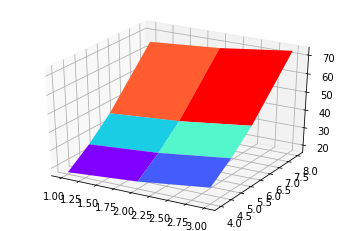

In [16]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,cmap='rainbow')
plt.show()

## Plotting with Elevation

In [18]:
a=[-3,-2,-1,0,1,2,3]
b=a
a,b=np.meshgrid(a,b)

print(a)
print(b)

[[-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]]
[[-3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3]]


In [19]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print("({},{})".format(b[i,j],a[i,j]),end=" ")
    print()

(-3,-3) (-3,-2) (-3,-1) (-3,0) (-3,1) (-3,2) (-3,3) 
(-2,-3) (-2,-2) (-2,-1) (-2,0) (-2,1) (-2,2) (-2,3) 
(-1,-3) (-1,-2) (-1,-1) (-1,0) (-1,1) (-1,2) (-1,3) 
(0,-3) (0,-2) (0,-1) (0,0) (0,1) (0,2) (0,3) 
(1,-3) (1,-2) (1,-1) (1,0) (1,1) (1,2) (1,3) 
(2,-3) (2,-2) (2,-1) (2,0) (2,1) (2,2) (2,3) 
(3,-3) (3,-2) (3,-1) (3,0) (3,1) (3,2) (3,3) 


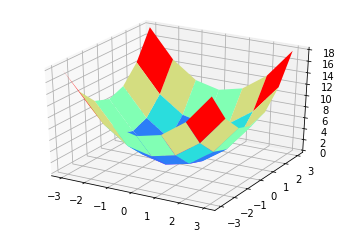

In [20]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,cmap='rainbow')
plt.show()

### Contour(Show Slice of surface)

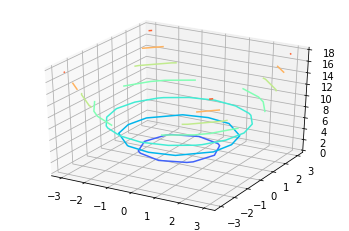

In [21]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(a,b,a**2+b**2,cmap='rainbow')
plt.show()

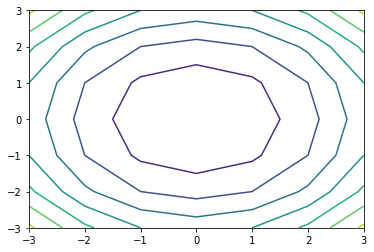

In [22]:
plt.contour(a,b,a**2+b**2)  #projecting the these concentric cirlcle and projecting on 2d plane
plt.show()

## Visualizing Gradient Descent

In [97]:
#error is constant along one coneentric cirlce 
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=1, bias=4.5, noise=3.3)
print(X.shape,y.shape)
X=X[:250]
y=y[:250]
print(X.shape,y.shape)

(500, 1) (500,)
(250, 1) (250,)


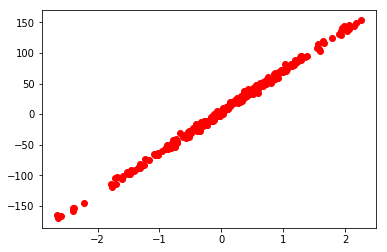

In [98]:
plt.figure()
plt.scatter(X,y,color="red")
plt.show()

In [100]:
theta_0=np.arange(-2,3,0.01)
theta_1=theta_0[:250]
theta_0=theta_1
print(theta_0.shape,theta_1.shape)

(250,) (250,)


In [101]:
theta_0,theta_1=np.meshgrid(theta_0,theta_1)
print(theta_0.shape,theta_1.shape)

(250, 250) (250, 250)


In [102]:
#Calculating Loss of every possible coordinate of i and j
J_theta=np.zeros_like(theta_0)
print(J_theta.shape)
for i in range(theta_0.shape[0]):
    for j in range(theta_0.shape[1]):
        J_theta[i,j]=np.sum((y-theta_1[i,j]*X-theta_0[i,j])**2)

(250, 250)


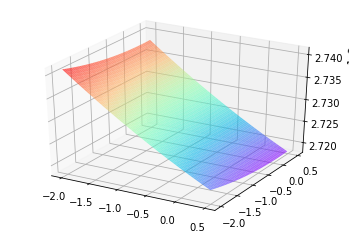

In [106]:
fig=plt.figure()
axes=fig.gca(projection="3d")
axes.plot_surface(theta_0,theta_1,J_theta,cmap="rainbow",alpha=0.6) #alpha for transperancy
plt.show()

### 3d Contour

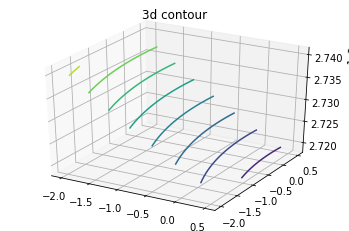

In [107]:
fig=plt.figure()
axes=fig.gca(projection="3d")
# axes.set_xlim([])
# axes.set_ylim([])
axes.contour(theta_0,theta_1,J_theta)
plt.title("3d contour")
plt.show()

### 2d Contour

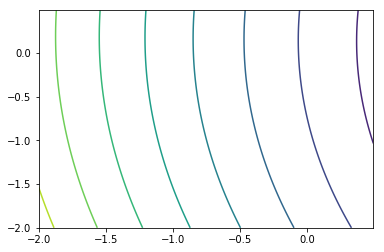

In [108]:
plt.figure()
plt.contour(theta_0,theta_1,J_theta)

### Plot the line move when we apply gradient `

In [134]:
#so we store error in  errror list when we update our theta0 or theta1
m=np.arange(-0.2,0.2,0.1)
n=m
print(n.shape,m.shape)
error_list=[(n[i],m[i]) for i in range(n.shape[0])]

(4,) (4,)


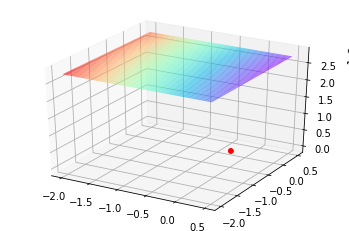

In [141]:
fig=plt.figure()
axes=fig.gca(projection="3d")
axes.scatter(error_list[0],error_list[1],color="red")
axes.plot_surface(theta_0,theta_1,J_theta,cmap="rainbow",alpha=0.6) #alpha for transperancy
plt.show()

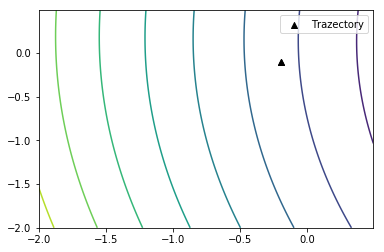

In [146]:
plt.figure()
plt.scatter(error_list[0],error_list[1],color="black",marker="^",label="Trazectory")
plt.legend()
plt.contour(theta_0,theta_1,J_theta)